# Data loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [3]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditCard Fraud Detection Model/E_Sun Data/train_data.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditCard Fraud Detection Model/E_Sun Data/test.csv')

In [4]:
train.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [5]:
test.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,215328.0,457,59360,N,0,102,0,592489
1,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,222007.0,457,59360,N,0,102,0,592452
2,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,100,170013.0,457,59360,N,0,102,0,590212
3,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,100,165914.0,457,59360,N,0,102,0,590209
4,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,215311.0,457,59360,N,0,102,0,592488


In [6]:
test['fraud_ind'] = -1

In [7]:
df = pd.concat([train, test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
df.shape

(1943452, 23)

**資料說明**   
*  總比數：1943452
*  授權期間：1-120日  
*  訓練集：1-90日  
*  測試集：91-120日
---
**欄位說明**

*   bacno：歸戶帳號
*   txkey：交易序號
*   locdt：授權日期
*   loctm：授權時間
*   cano：交易卡號
*   etymd：交易型態
*   mchno：特店代號
*   acqic：收單行代碼
*   mcc：MCC_CODE
*   conam：交易金額-台幣 (經過轉換)
*   ecfg：網路交易註記
*   insfg：分期交易註記
*   iterm：分期期數
*   stocn：消費地國別
*   scity：消費城市
*   stscd：狀態碼
*   ovrlt：超額註記碼
*   flbmk：Fallback 註記
*   hcefg：支付形態
*   csmcu：消費地幣別
*   flg_3dsmk：3DS 交易註記

*   fraud_ind：盜刷註記



In [9]:
df.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06
mean,6.004543e+03,8.208741e+04,1.090453e+05,6.516174e+02,4.825625e+00,5.378875e+01,4.142680e+00,-2.064934e-01,4.748365e+00,4.841128e-02,5.839281e+01,1.460061e+05,2.979138e+02,5.589230e+04,4.754399e+03,9.562308e+01,2.475286e-02,9.791667e+05
std,1.505735e+03,4.732348e+04,6.110356e+04,4.032183e+02,6.557577e-01,2.076681e+01,2.402570e+00,4.298851e-01,1.114383e+00,3.615652e-01,3.409522e+01,5.227967e+04,7.841150e+01,3.082944e+04,1.982351e+03,1.896446e+01,2.211643e-01,5.654969e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.129400e+04,5.751900e+04,4.300400e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.900000e+01,1.104500e+05,2.500000e+02,3.362500e+04,3.952000e+03,1.020000e+02,0.000000e+00,4.896218e+05
50%,6.678000e+03,8.196600e+04,1.099410e+05,5.887500e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,5.800000e+01,1.513290e+05,2.640000e+02,5.933300e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.794235e+05
75%,6.769000e+03,1.229640e+05,1.621700e+05,8.025400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,8.700000e+01,1.857550e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.468711e+06
max,6.884000e+03,1.638860e+05,2.135750e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,1.200000e+02,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.080000e+02,4.000000e+00,1.959018e+06


# Data Preprocessing

In [10]:
#locdt
df['weekday'] = df['locdt'] % 7

In [11]:
##loctm
df['loctm_hh'] = df['loctm'].apply(lambda x: math.floor(x/10000))
df['loctm_mm'] = df['loctm'].apply(lambda x: math.floor(x/100)-math.floor(x/10000)*100)
df['loctm_ss'] = df['loctm'].apply(lambda x: math.floor(x)-math.floor(x/100)*100)

In [12]:
#change to boolean
df['ecfg'] = df['ecfg'].map({'N':False, 'Y':True})
df['flbmk'] = df['flbmk'].map({'N':False, 'Y':True})
df['flg_3dsmk'] = df['flg_3dsmk'].map({'N':False, 'Y':True})
df['insfg'] = df['insfg'].map({'N':False, 'Y':True})
df['ovrlt'] = df['ovrlt'].map({'N':False, 'Y':True})
df['fraud_ind'] = df['fraud_ind'].map({0:False, 1:True})

In [13]:
#change to object

cat_cols = ['acqic','bacno','cano','contp','csmcu','etymd',
            'hcefg',
            'mcc','mchno','scity','stocn','stscd','txkey']
bool_cols = ['ecfg','flbmk','flg_3dsmk','insfg','ovrlt']
num_cols = ['conam','iterm','locdt','loctm','weekday','loctm_hh','loctm_mm','loctm_ss']
df[cat_cols] = df[cat_cols].astype('object')      

In [14]:
df.dtypes

acqic         object
bacno         object
cano          object
conam        float64
contp         object
csmcu         object
ecfg            bool
etymd         object
flbmk         object
flg_3dsmk     object
fraud_ind     object
hcefg         object
insfg           bool
iterm          int64
locdt          int64
loctm        float64
mcc           object
mchno         object
ovrlt           bool
scity         object
stocn         object
stscd         object
txkey         object
weekday        int64
loctm_hh       int64
loctm_mm       int64
loctm_ss       int64
dtype: object

# EDA

## pandas_profiling

In [15]:
## EDA with pandas_profiling (使用pandas 1.0有bug, 因此先降版為0.25.0)
!pip install pandas==0.25.0
import pandas as pd
import pandas_profiling as pdp
pd.__version__

'0.25.0'

In [16]:
profile_train = pdp.ProfileReport(df)
!mkdir -p /content/drive/My\ Drive/Colab\ Notebooks/CreditCard\ Fraud\ Detection\ Model/EDA/
profile_train.to_file("/content/drive/My Drive/Colab Notebooks/CreditCard Fraud Detection Model/EDA/df_all_EDA.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


# Customer Classify

## Card Type


---

前提假設：假定顧客皆為理性消費者，會根據信用卡的權益內容選定適合的信用卡進行消費  
根據玉山銀行信用卡產品，主要分為以下三類：  
*   聯名卡：針對聯名特店進行消費（ex: 家樂福聯名卡、南山人壽聯名卡、統一時代聯名卡等）
*   海外消費：針對海外交易進行消費（ex: 雙幣卡、only卡）
*   一般消費：Pi 拍錢包信用卡、UBear信用卡（針對數位通路.超商等消費加碼回饋）

分類基準：
*   是否為海外消費
*   是否為網購
*   MCC消費種類數






In [17]:
df.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,weekday,loctm_hh,loctm_mm,loctm_ss
0,6881,113261,38038,513.80,5,0,False,0,False,False,False,5,False,0,33,172652.0,457,59333,False,0,102,0,516056,5,17,26,52
1,0,134508,45725,465.62,5,0,False,2,False,False,False,0,False,0,9,105114.0,451,0,False,5817,102,0,4376,2,10,51,14
2,6881,15408,188328,513.80,5,0,False,0,False,False,False,5,False,0,6,152458.0,457,59333,False,0,102,0,483434,6,15,24,58
3,6716,157159,29967,1016.11,5,62,False,5,False,False,False,5,False,0,5,172946.0,247,50436,False,3281,102,0,1407164,5,17,29,46
4,5975,105985,81305,713.66,5,62,False,4,False,False,False,5,False,0,6,182129.0,263,93775,False,5817,102,0,1051004,6,18,21,29


### 是否為海外消費

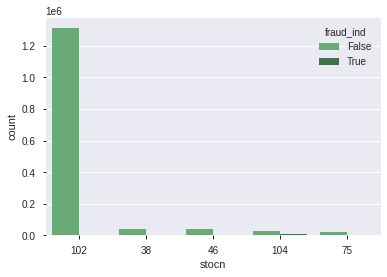

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="stocn", hue="fraud_ind", data=df[df.fraud_ind!=-1], palette="Greens_d",
              order=pd.value_counts(df[df.fraud_ind!=-1]['stocn']).iloc[:5].index)
## 102為國內消費

In [19]:
df["oversea_flag"] = df.stocn != 102

In [20]:
# change to percentage
oversea_pct = df.loc[:,['cano','oversea_flag']][df.fraud_ind!=-1].groupby('cano').mean()

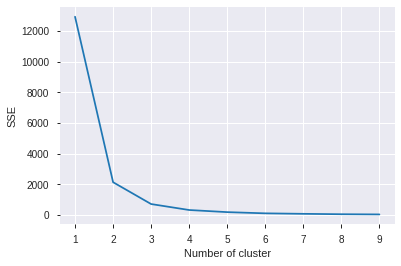

In [21]:
# clustering by k-means with elbow method
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(oversea_pct)
#   oversea_pct["clusters"] = kmeans.labels_
#   print(oversea_pct["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [24]:
##k = 2 
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(oversea_pct)
oversea_pct["clusters"] = kmeans.labels_
oversea_pct.head(20)

,oversea_flag,clusters
cano,,
0,0.000000,0
1,0.000000,0
2,0.000000,0
3,0.000000,0
4,0.000000,0
5,0.000000,0
6,0.000000,0
7,0.000000,0
8,0.142857,0


### 是否為網購消費

In [25]:
# change to percentage
ecfg_pct = df.loc[:,['cano','ecfg']][df.fraud_ind!=-1].groupby('cano').mean()

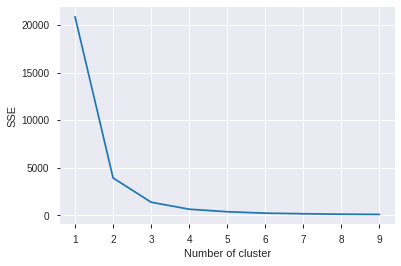

In [26]:
# clustering by k-means with elbow method
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ecfg_pct)
#   oversea_pct["clusters"] = kmeans.labels_
#   print(oversea_pct["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [27]:
##k = 2 
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(ecfg_pct)
ecfg_pct["clusters"] = kmeans.labels_
ecfg_pct.head(20)

,ecfg,clusters
cano,,
0,0.000000,0
1,0.000000,0
2,0.088235,0
3,0.000000,0
4,0.000000,0
5,0.080000,0
6,0.222222,0
7,0.225806,0
8,0.214286,0


### MCC消費種類數

#### MCC消費種類分群 [(連結)](https://zh.wikipedia.org/wiki/商户类别代码)

---
由於一個商戶類別是由好幾種MCC CODE組成  
假定同一種商戶類別，底下各自的MCC CODE資料有相似的敘述統計量


In [28]:
mcc_code = df.loc[:,['mcc', 'conam']].groupby(['mcc']).describe() 

In [29]:
 mcc_code.columns

MultiIndex([('conam', 'count'),
            ('conam',  'mean'),
            ('conam',   'std'),
            ('conam',   'min'),
            ('conam',   '25%'),
            ('conam',   '50%'),
            ('conam',   '75%'),
            ('conam',   'max')],
           )

In [30]:
mcc_code.columns = mcc_code.columns.droplevel()

In [31]:
mcc_code.fillna(0, inplace=True)

In [32]:
mcc_code.head(5)

,count,mean,std,min,25%,50%,75%,max
mcc,,,,,,,,
0,10.0,2086.201000,445.418031,1558.27,1769.2875,1876.195,2549.7300,2712.71
1,1.0,1063.150000,0.000000,1063.15,1063.1500,1063.150,1063.1500,1063.15
2,99.0,989.657172,349.685190,229.88,732.9900,974.230,1189.3000,2168.49
3,122.0,584.460902,274.321607,140.93,391.7000,500.140,749.8875,1413.82
4,5.0,1198.382000,413.414378,731.82,776.7800,1364.660,1557.1600,1561.49


In [33]:
mcc_code.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

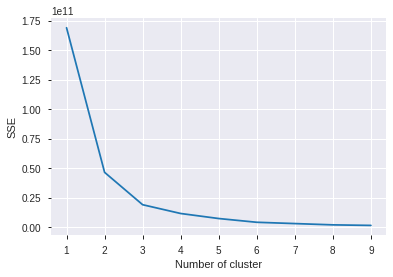

In [35]:
# clustering by k-means with elbow method
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(mcc_code)
#   oversea_pct["clusters"] = kmeans.labels_
#   print(oversea_pct["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### 各卡MCC消費占比

In [37]:
# count mcc
mcc_txn_cnt = df.loc[:,['cano','mcc', 'conam']][df.fraud_ind!=-1].groupby(['cano','mcc']).count()
mcc_cnt = df.loc[:,['cano','mcc', 'conam']][df.fraud_ind!=-1].groupby(['cano','mcc']).count().groupby(['cano']).count()

In [39]:
mcc_txn_cnt.groupby(['cano']).mean().head(5)

,conam
cano,
0,2.25
1,1.50
2,8.50
3,1.50
4,1.00


In [40]:
 mcc_pct = mcc_txn_cnt.groupby(['cano']).apply(lambda x:100 * x / float(x.sum()))

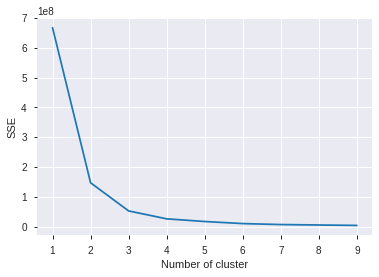

In [41]:
# clustering by k-means with elbow method
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(mcc_pct)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [42]:
##k = 3 
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(mcc_pct)
mcc_pct["clusters"] = kmeans.labels_
mcc_pct

conam  clusters
cano   mcc                      
0      228   11.111111         1
       251   66.666667         0
       255   11.111111         1
       286   11.111111         1
1      286   33.333333         0
...                ...       ...
213570 343  100.000000         2
213571 251   50.000000         0
       453   50.000000         0
213572 343  100.000000         2
213575 343  100.000000         2

[763502 rows x 2 columns]

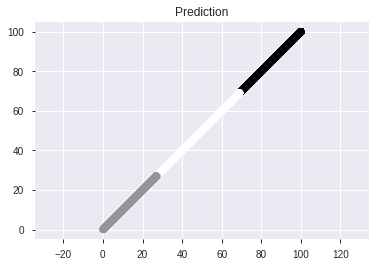

In [43]:
#results visualization
plt.figure()
plt.scatter(mcc_pct['conam'], mcc_pct['conam'], c = mcc_pct['clusters'])
plt.axis('equal')
plt.title('Prediction')
plt.show()

In [44]:
mcc_pct.groupby(['clusters']).describe()

conam                        ...                                    
             count       mean        std  ...         50%         75%         max
clusters                                  ...                                    
0         155248.0  43.927564  11.328874  ...   42.857143   50.000000   69.767442
1         515810.0  10.823179   7.008836  ...    9.090909   16.071429   27.368421
2          92444.0  95.662561   8.780825  ...  100.000000  100.000000  100.000000

[3 rows x 8 columns]

#### 各卡MCC消費類型分群

In [45]:
mcc_pct_sum = mcc_pct.groupby(['cano','clusters']).sum()

In [46]:
mcc_pct_sum['rank'] = mcc_pct.groupby(['cano','clusters']).sum().groupby(['cano']).rank(ascending=False, method='max')

In [47]:
mcc_pct_sum[mcc_pct_sum['rank']==1].head(20)

,,conam,rank
cano,clusters,,
0,0,66.666667,1.0
1,0,100.000000,1.0
2,2,85.294118,1.0
3,0,100.000000,1.0
4,2,100.000000,1.0
5,1,68.000000,1.0
6,1,55.555556,1.0
7,1,100.000000,1.0
8,1,71.428571,1.0
